In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import json
import os

from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# === 설정 ===
data_path = './src/ProcessedResumeDataSet.csv'
model_path = './model/knn_model.pkl'
metrics_path = './model/knn_metrics.json'
vectorizer_max_features = 3000
output_dir = './output'
os.makedirs(output_dir, exist_ok=True)

In [3]:
# === 데이터 로딩 ===
df = pd.read_csv(data_path)
df['label'] = df['Category'].astype('category').cat.codes
label_map = dict(enumerate(df['Category'].astype('category').cat.categories))

In [4]:
# === 모델 및 벡터화 로딩 ===
model = joblib.load(model_path)
vectorizer = TfidfVectorizer(max_features=vectorizer_max_features)
X = vectorizer.fit_transform(df['cleaned_resume'])
y_true = df['label']
y_pred = model.predict(X)

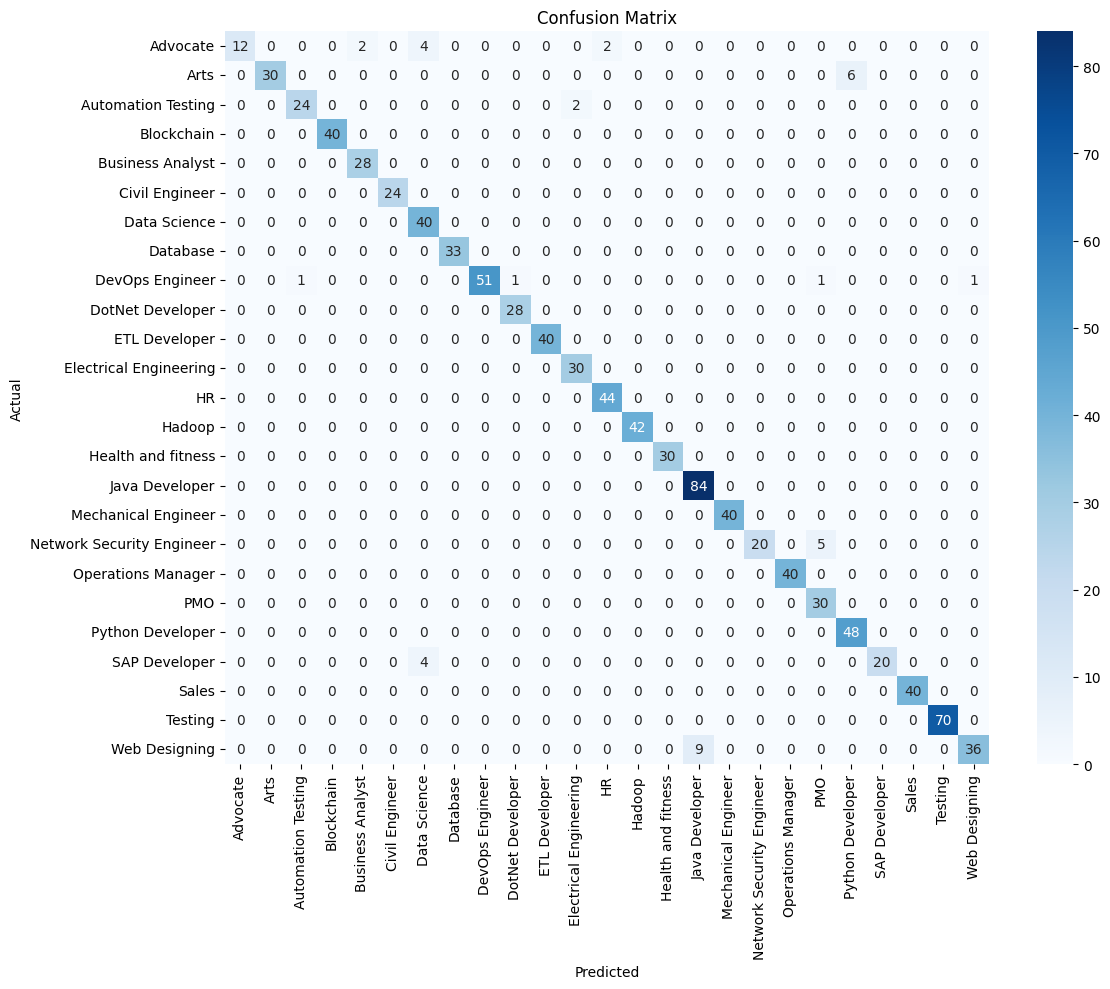

Confusion matrix 저장 완료


In [7]:
# === Confusion Matrix 시각화 ===
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_map.values(), yticklabels=label_map.values())
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig(f"{output_dir}/confusion_matrix.png")
plt.show()
plt.close()
print("Confusion matrix 저장 완료")

In [8]:
# === Classification Report 저장 ===
report = classification_report(y_true, y_pred, target_names=label_map.values(), output_dict=True)
with open(f"{output_dir}/classification_report.json", "w") as f:
    json.dump(report, f, indent=4)
print("classification_report 저장 완료")

classification_report 저장 완료


In [9]:
# === 오분류된 샘플 확인 ===
df['predicted'] = [label_map[p] for p in y_pred]
df['actual'] = [label_map[t] for t in y_true]
misclassified = df[df['predicted'] != df['actual']][['Resume', 'cleaned_resume', 'actual', 'predicted']]
misclassified.head(10).to_csv(f"{output_dir}/misclassified_samples.csv", index=False)
print("오분류 샘플 저장 완료 (misclassified_samples.csv)")


오분류 샘플 저장 완료 (misclassified_samples.csv)


In [10]:
joblib.dump(vectorizer, './model/tfidf_vectorizer.pkl')

['./model/tfidf_vectorizer.pkl']

In [11]:
joblib.dump(label_map, './model/label_map.pkl')


['./model/label_map.pkl']